In [1]:
%matplotlib inline


# Neighbors enrichment analysis

This example shows how to run the neighbors enrichment analysis routine.

It calculates an enrichment score based on proximity on the connectivity graph of cell clusters.
The number of observed events is compared against $N$ permutations and a *z-score* is computed.

:::{seealso}

    See {doc}`compute_spatial_neighbors` for general usage of
    {func}`squidpy.gr.spatial_neighbors`.

:::


In [2]:
import squidpy as sq

adata = sq.datasets.visium_fluo_adata()
adata

/Users/chiaraschiller/miniconda3/envs/squidpy-dev2/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


  0%|          | 0.00/242M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 2800 × 16562
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

This dataset contains cell type annotations in {attr}`anndata.Anndata.obs` which are used for calculation of the
neighborhood enrichment. First, we need to compute a connectivity matrix from spatial coordinates.



In [3]:
sq.gr.spatial_neighbors(adata)

Then we can calculate the neighborhood enrichment score with {func}`squidpy.gr.nhood_enrichment`. First, we do not normalize the neighbor counts which leads to symmetric neighbor enrichment scores between cell types.



In [8]:
sq.gr.nhood_enrichment(adata, cluster_key="cluster", normalization = "none")

  0%|          | 0/1000 [00:00<?, ?/s]

/Users/chiaraschiller/miniconda3/envs/squidpy-dev2/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


And visualize the results with {func}`squidpy.pl.nhood_enrichment`.



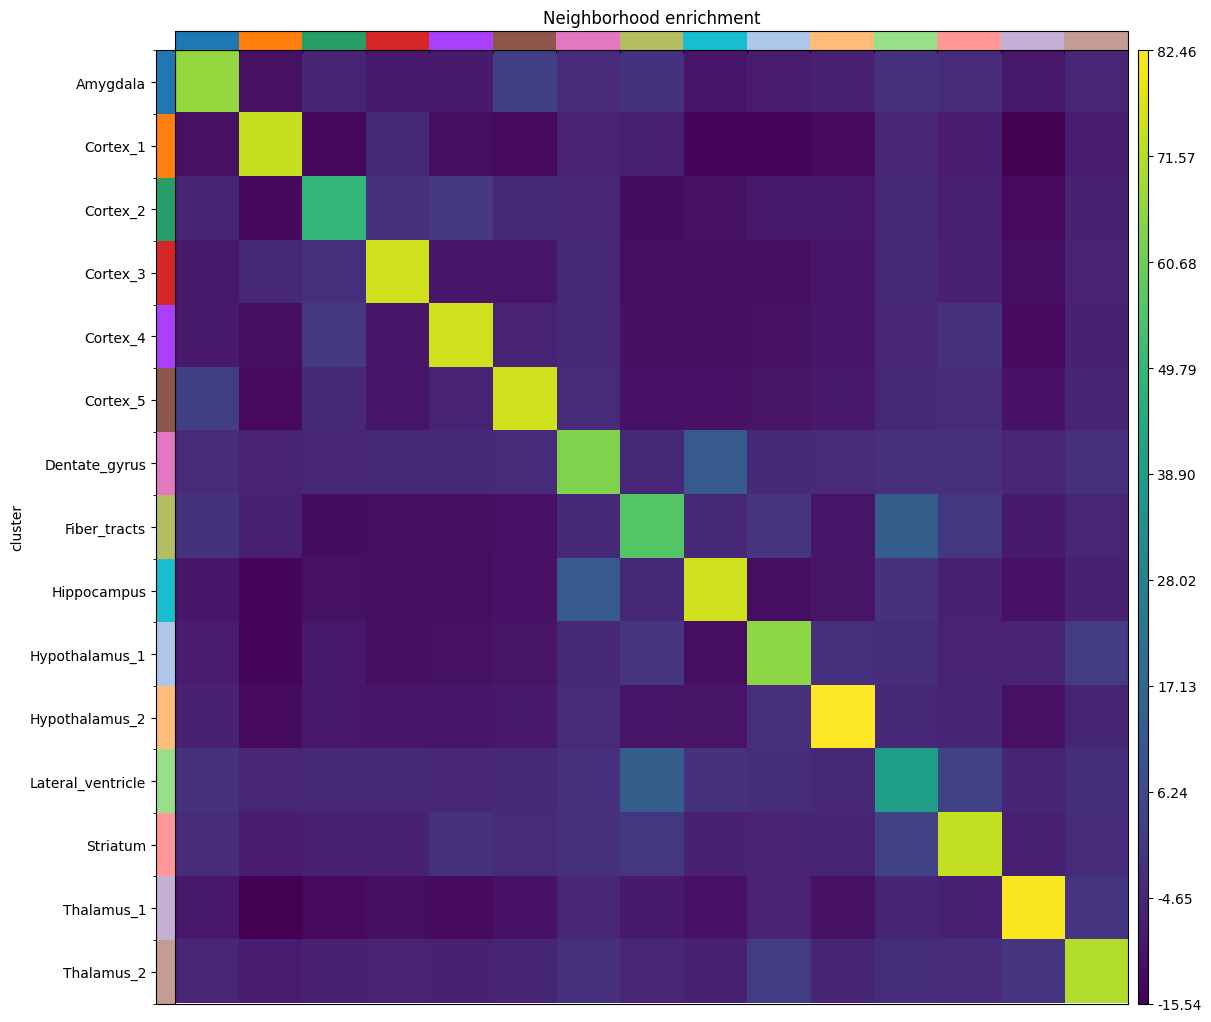

In [9]:
sq.pl.nhood_enrichment(adata, cluster_key="cluster")

Conditional normalization like COZI performs as described in [Schiller et al, bioRxiv 2025](https://www.biorxiv.org/content/10.1101/2025.03.31.646289v2) allows to capture directionality of neighbor enrichments, which is visible in an asymmetric neighbor enrichment matrix.

In [10]:
sq.gr.nhood_enrichment(adata, cluster_key="cluster", normalization = "conditional")

  0%|          | 0/1000 [00:00<?, ?/s]

/Users/chiaraschiller/miniconda3/envs/squidpy-dev2/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


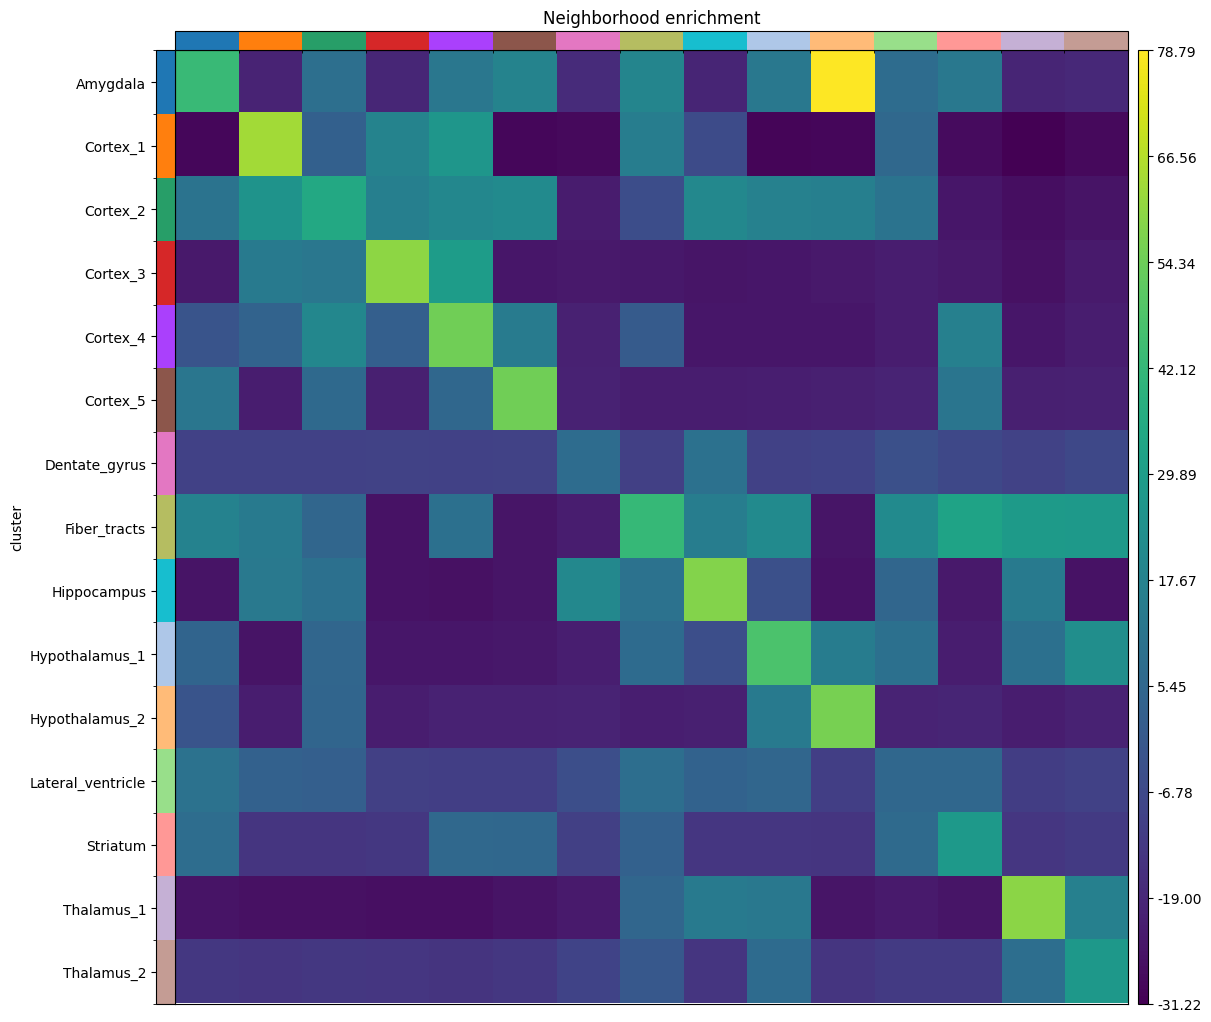

In [11]:
sq.pl.nhood_enrichment(adata, cluster_key="cluster")